# Linear Regression


> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# working on a car dataset which contains
- Big Mac Price in USD
- Hourly Wages in USD

In [35]:
sns.set(color_codes=True)

In [36]:
big = pd.read_excel('./dataset/BigMaxIndex.xlsx',sheet_name='BigMaxIndex')
big.head()

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [37]:
big.mean()

Big Mac Price in USD    2.236667
Hourly Wages in USD     6.070000
dtype: float64

In [38]:
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Country                 27 non-null object
Big Mac Price in USD    27 non-null float64
Hourly Wages in USD     27 non-null float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


### Descriptive Stats

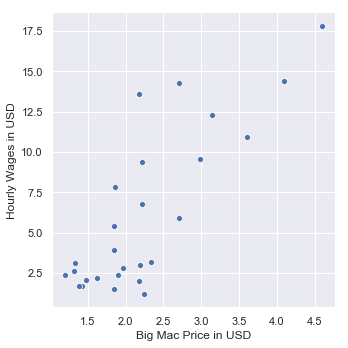

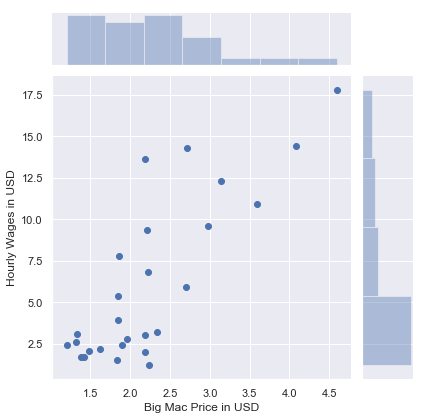

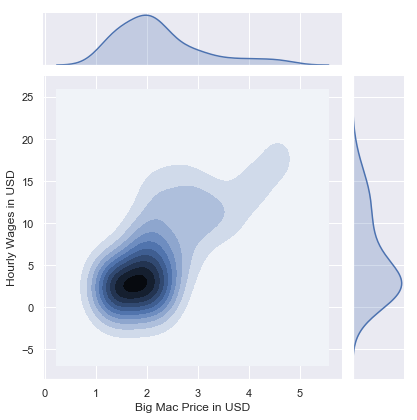

In [39]:
sns.relplot('Big Mac Price in USD','Hourly Wages in USD',
            data=big,kind='scatter')
plt.show()
sns.jointplot('Big Mac Price in USD','Hourly Wages in USD'
              ,data=big,kind='scatter')
plt.show()
sns.jointplot('Big Mac Price in USD','Hourly Wages in USD'
              ,data=big,kind='kde')
plt.show()

In [40]:
import statsmodels.formula.api as smf

In [41]:
big.keys()

Index(['Country', 'Big Mac Price in USD', 'Hourly Wages in USD'], dtype='object')

In [42]:
big.columns = ['Country','BigMac','HourlyWages']

In [43]:
big.keys()

Index(['Country', 'BigMac', 'HourlyWages'], dtype='object')

In [44]:
model = smf.ols(formula="HourlyWages~BigMac",data=big)
results = model.fit()

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HourlyWages   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           2.50e-07
Time:                        05:26:43   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.010      -7.873      -1.206
BigMac         4.7435      0.678      6.991      0.000       3.346       6.141
==============================================================================
Omnibus:                        5.597   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                3.761
Skew:                           0.829   Prob(JB):                        0.153
Kurtosis:                       3.771   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Covariance

In [46]:
big.cov()

,BigMac,HourlyWages
BigMac,0.714815,3.390746
HourlyWages,3.390746,24.310415


>### Correlation coefficient (*r* )

In [47]:
big.corr()

,BigMac,HourlyWages
BigMac,1.000000,0.813396
HourlyWages,0.813396,1.000000


In [48]:
results.params

Intercept   -4.539689
BigMac       4.743527
dtype: float64

In [49]:
results.rsquared

0.6616133883877515

In [50]:
import statsmodels.api as sm

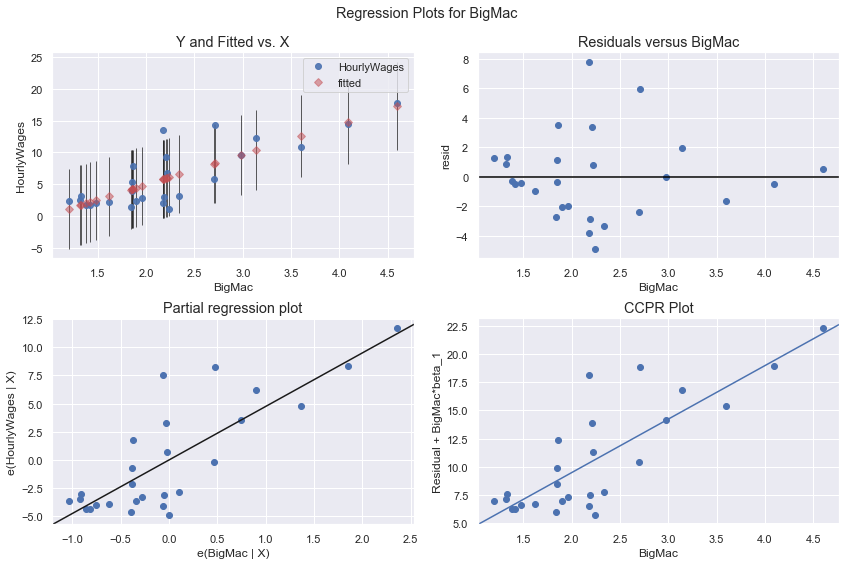

In [51]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'BigMac',fig=fig)

In [52]:
# 3 USD
hourlywages = -4.53+4.74*3
print('Hourly wages in USD =',hourlywages)

Hourly wages in USD = 9.690000000000001


# Residual Analysis
> ### Residues =$ y_i - \hat y$

In [53]:
res = results.resid

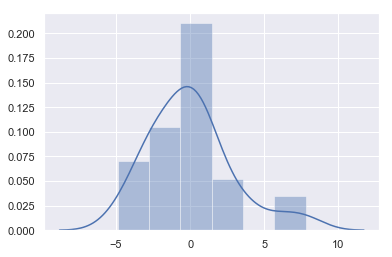

In [54]:
# res.plot(kind='hist')
# plt.show()
# res.plot(kind='kde',)
# plt.show()
sns.distplot(res)

> ### Quantile Quantile Plot

<Figure size 720x360 with 0 Axes>

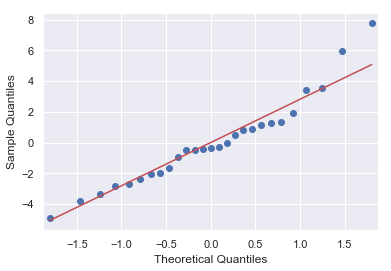

In [55]:
fig=plt.figure(figsize=(10,5))
fig= sm.graphics.qqplot(res,line='s')
plt.show()

# Taking non linear data

In [56]:
d = np.random.exponential(size=100)

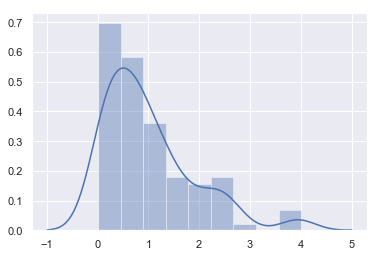

In [57]:
sns.distplot(d)

<Figure size 720x360 with 0 Axes>

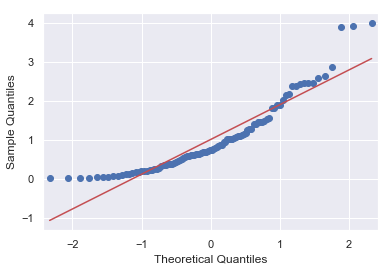

In [58]:
fig=plt.figure(figsize=(10,5))
fig= sm.graphics.qqplot(d,line='s')
plt.show()

In [59]:
import scipy

In [60]:
scipy.stats.shapiro(res)

(0.9490323066711426, 0.2030830681324005)

In [62]:
sm.stats.diagnostic.kstest_normal(res)

(0.13614199659473336, 0.2)

# Confidence Interval

In [63]:
big.keys()

Index(['Country', 'BigMac', 'HourlyWages'], dtype='object')

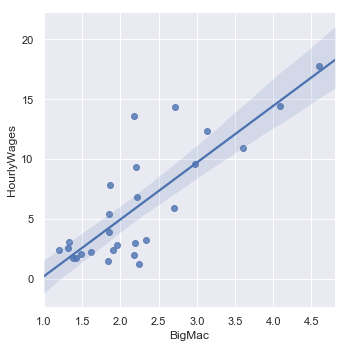

In [64]:
sns.lmplot('BigMac','HourlyWages',data=big)

# Leverage

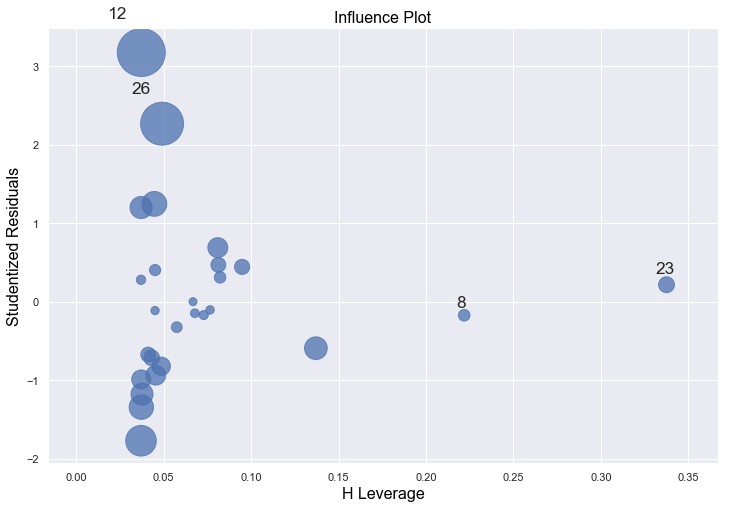

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

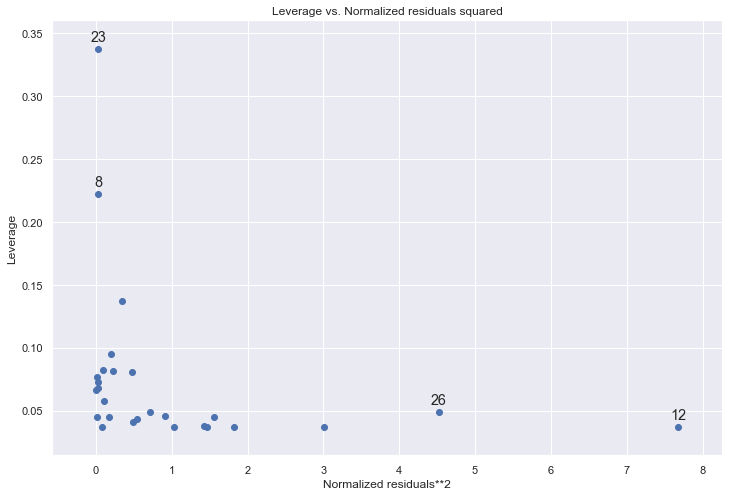

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)